In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from os import listdir
from os.path import isfile, join
import seaborn as sns

In [2]:
large = 11; med = 8; small = 6
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (8, 5),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')


C:\Users\Ivan Kushnir\AppData\Local\Temp\ipykernel_13436\2961859001.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
mypath = "D:\HomeTask\LSTM_250_L2/"
onlyfiles = listdir(mypath)
#for i in range(0, len(onlyfiles)):
#    onlyfiles[i] = onlyfiles[i][:-4]
accuracy = pd.DataFrame()
accuracy.index = onlyfiles
accuracy['accuracy'] = ""

In [4]:
for file in onlyfiles[1:]:
    df = pd.read_csv(mypath+file+'/log.csv', sep = ';')
    x = df.iloc[[100]]['epoch']
    accuracy.loc[file, 'accuracy'] = x[100]
    df = df.drop([100])
    df = df.drop(['epoch'], axis=1)
    plt.figure(figsize=(16, 10), dpi= 300, facecolor='w', edgecolor='k')
    df.plot(style='.')
    plt.gca().set(xlim=(0.0, 100),xlabel='Epoch', ylabel='Loss, log sacle')
    plt.title(file, fontsize=11)
    plt.gca().set_yscale('log')
    plt.savefig('D:/HomeTask/LSTM_250_L2/1_image/' +file+'.png')
    plt.close('all')

<Figure size 9000x3000 with 0 Axes>

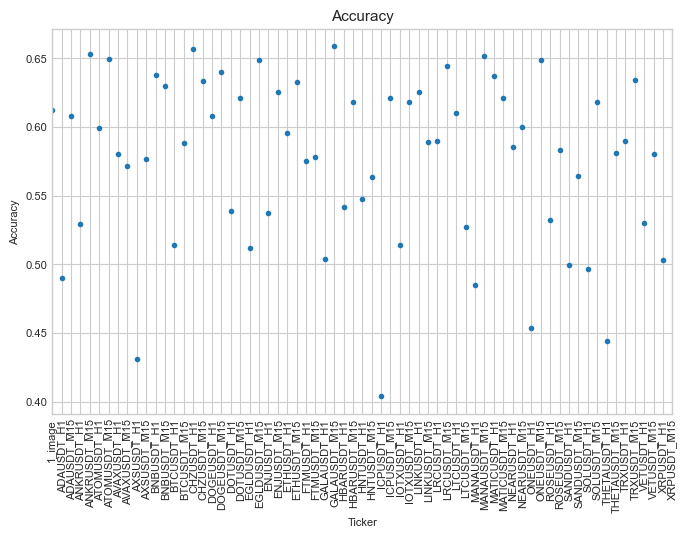

In [8]:
x = np.arange(len(onlyfiles))
fig = plt.figure(figsize=(30, 10), dpi= 300, facecolor='w', edgecolor='k')
accuracy.plot(style='.')
plt.gca().set(xlim=(0.0, 66),xlabel='Ticker', ylabel='Accuracy')
plt.xticks(x,onlyfiles, rotation=90)
plt.title('Accuracy', fontsize=11)
plt.gca().get_legend().remove()

plt.savefig('D:\HomeTask\LSTM_250_L2/1_image/accuracy.png', bbox_inches='tight')

In [6]:
accuracy.accuracy
accuracy = accuracy.drop(['1_image'])

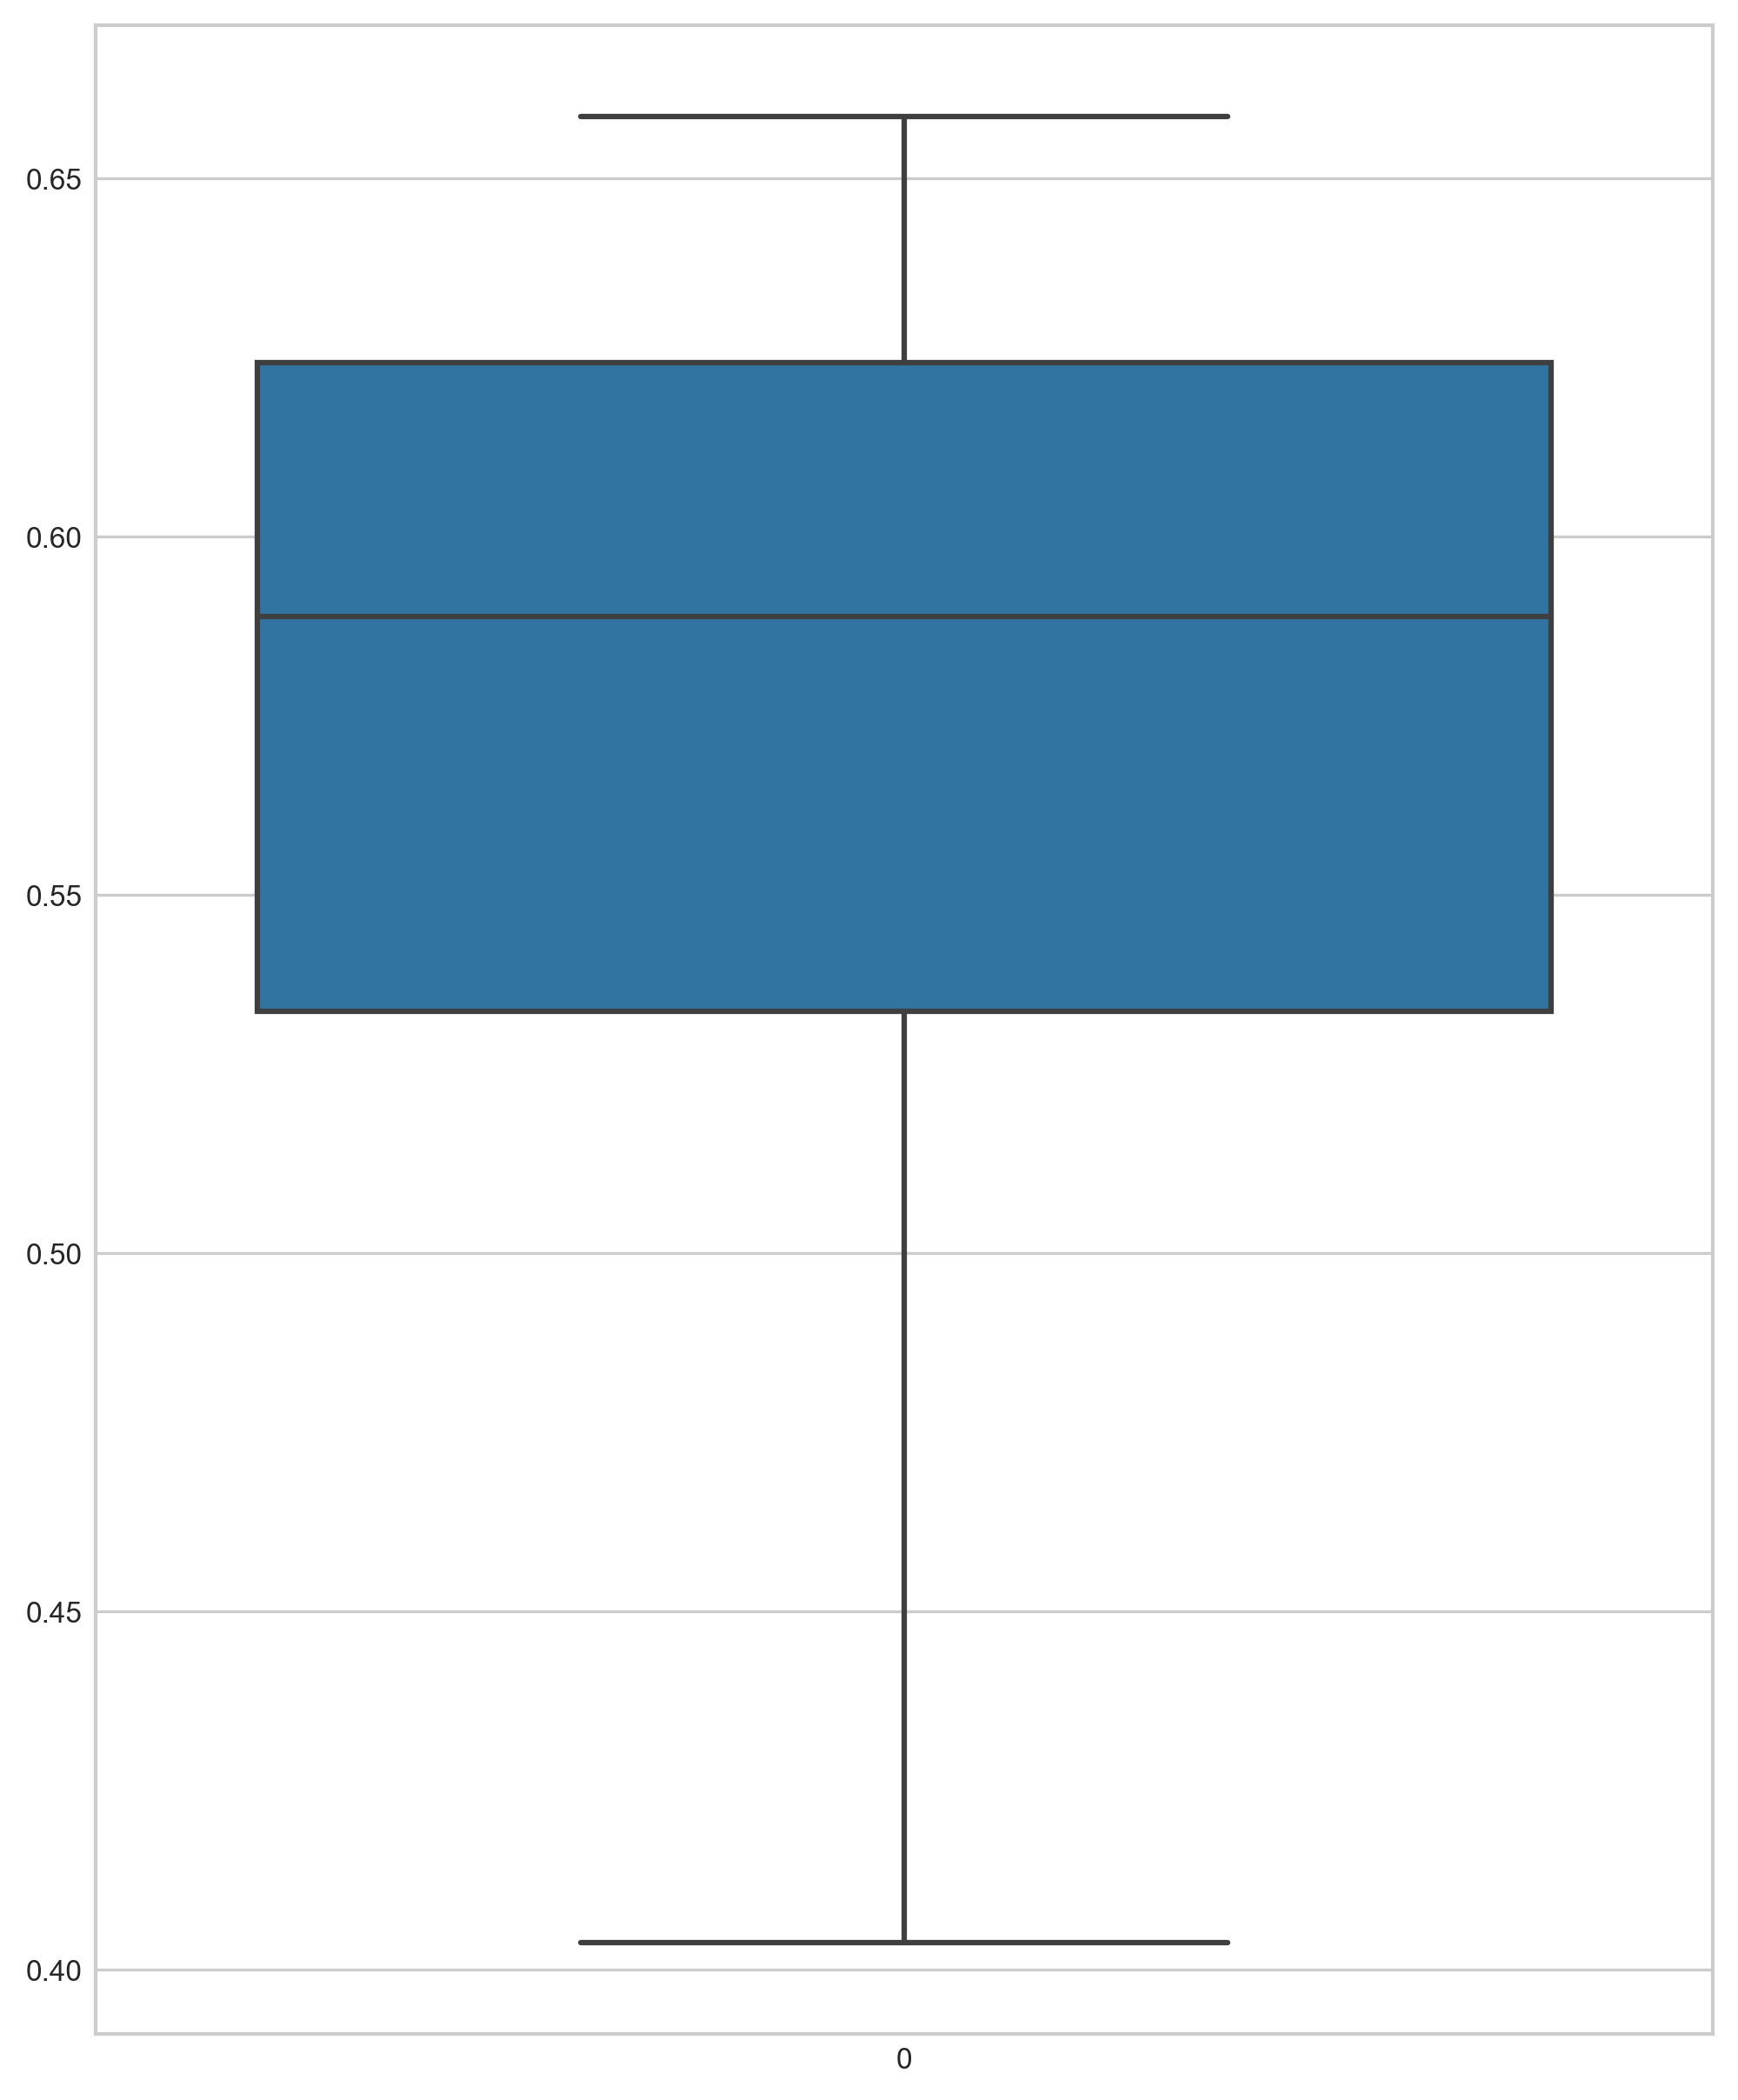

In [9]:
plt.figure(figsize=(8, 10), dpi= 300, facecolor='w', edgecolor='k')
sns.boxplot(accuracy.accuracy)
plt.savefig('D:\HomeTask\LSTM_250_L2/1_image/accuracy_boxplot.png', bbox_inches='tight')